In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import mplfinance as mpf
from pandas_datareader import data
import datetime as dt
import yfinance as yf
yf.pdr_override()

In [2]:
start = dt.datetime(2019, 11, 1)
end = dt.datetime(2020, 11, 1)

df = data.get_data_yahoo('^N225', start, end)

date = df.index

[*********************100%***********************]  1 of 1 completed


In [3]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-11-01,22730.490234,22852.720703,22705.599609,22850.769531,22850.769531,65400000
2019-11-05,23118.789062,23328.519531,23090.939453,23251.990234,23251.990234,102100000
2019-11-06,23343.509766,23352.560547,23246.570312,23303.820312,23303.820312,77400000
2019-11-07,23283.140625,23336.000000,23253.320312,23330.320312,23330.320312,70900000
2019-11-08,23550.039062,23591.089844,23313.410156,23391.869141,23391.869141,94600000


In [4]:
high = df['High']
low = df['Low']

max26 = high.rolling(window=26).max()
min26 = low.rolling(window=26).min()

df['basic_line'] = (max26 + min26) / 2

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,basic_line
Date,,,,,,,
2020-10-26,23520.779297,23572.599609,23475.519531,23494.339844,23494.339844,41700000,23338.495117
2020-10-27,23376.960938,23485.800781,23232.310547,23485.800781,23485.800781,52700000,23338.495117
2020-10-28,23372.609375,23451.029297,23334.230469,23418.509766,23418.509766,67100000,23338.495117
2020-10-29,23170.759766,23374.099609,23170.759766,23331.939453,23331.939453,57500000,23338.495117
2020-10-30,23320.710938,23320.710938,22948.470703,22977.130859,22977.130859,76700000,23337.025391


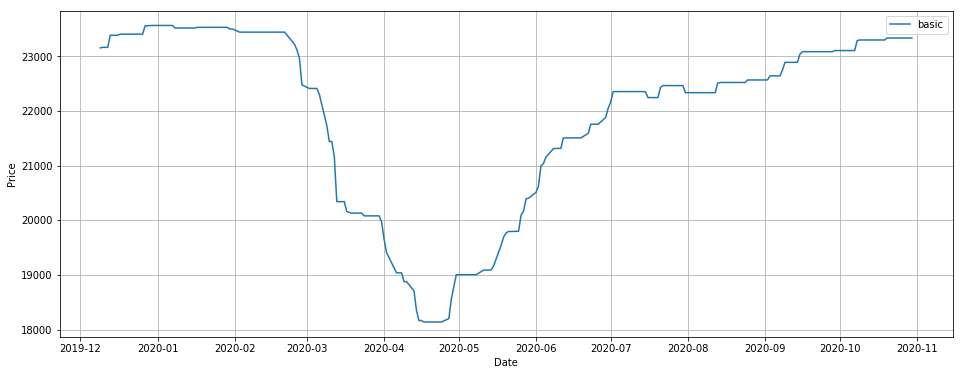

In [6]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [7]:
high9 = high.rolling(window=9).max()
low9 = low.rolling(window=9).min()

df['turn_line'] = (high9 + low9) / 2

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,basic_line,turn_line
Date,,,,,,,,
2020-10-26,23520.779297,23572.599609,23475.519531,23494.339844,23494.339844,41700000,23338.495117,23544.915039
2020-10-27,23376.960938,23485.800781,23232.310547,23485.800781,23485.800781,52700000,23338.495117,23469.735352
2020-10-28,23372.609375,23451.029297,23334.230469,23418.509766,23418.509766,67100000,23338.495117,23469.735352
2020-10-29,23170.759766,23374.099609,23170.759766,23331.939453,23331.939453,57500000,23338.495117,23438.959961
2020-10-30,23320.710938,23320.710938,22948.470703,22977.130859,22977.130859,76700000,23337.025391,23325.385742


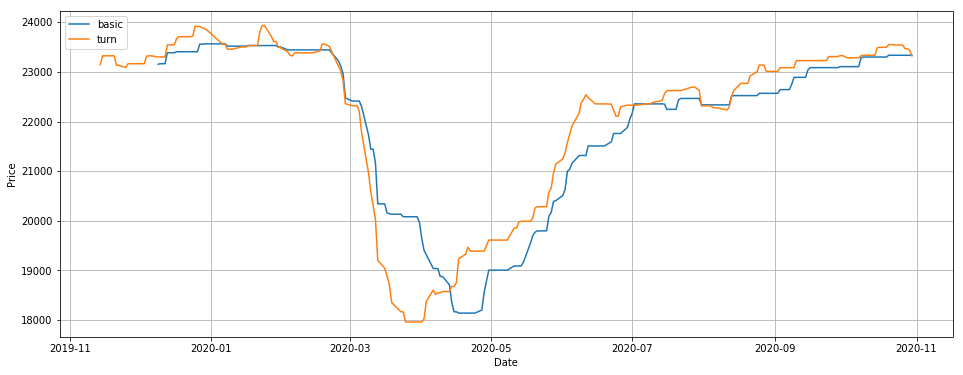

In [9]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()


In [10]:
df['span1'] = (df['basic_line'] + df['turn_line']) / 2

In [11]:
high52 = high.rolling(window=52).max()
low52 = low.rolling(window=52).min()

df['span2'] = (high52 + low52) / 2

In [12]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,basic_line,turn_line,span1,span2
Date,,,,,,,,,,
2020-10-26,23520.779297,23572.599609,23475.519531,23494.339844,23494.339844,41700000,23338.495117,23544.915039,23441.705078,23111.325195
2020-10-27,23376.960938,23485.800781,23232.310547,23485.800781,23485.800781,52700000,23338.495117,23469.735352,23404.115234,23160.184570
2020-10-28,23372.609375,23451.029297,23334.230469,23418.509766,23418.509766,67100000,23338.495117,23469.735352,23404.115234,23160.184570
2020-10-29,23170.759766,23374.099609,23170.759766,23331.939453,23331.939453,57500000,23338.495117,23438.959961,23388.727539,23160.184570
2020-10-30,23320.710938,23320.710938,22948.470703,22977.130859,22977.130859,76700000,23337.025391,23325.385742,23331.205566,23160.184570


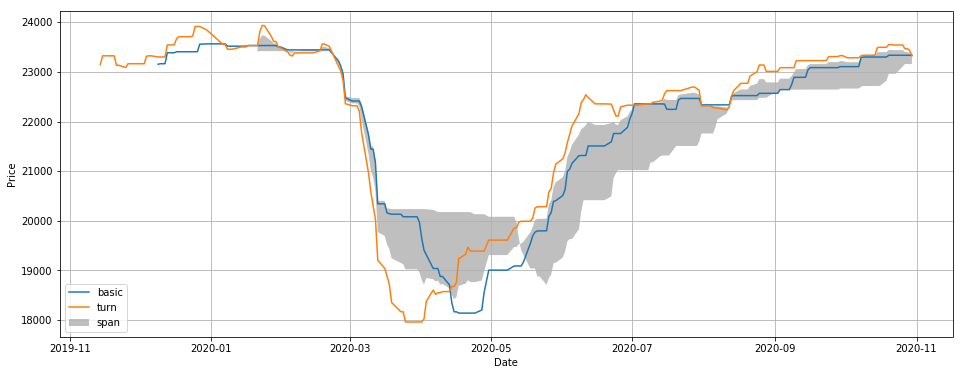

In [13]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.fill_between(date, df['span1'], df['span2'], facecolor='gray', alpha=0.5, label='span')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [14]:
df['slow_line'] = df['Close'].shift(-25)

In [15]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,basic_line,turn_line,span1,span2,slow_line
Date,,,,,,,,,,,
2019-11-01,22730.490234,22852.720703,22705.599609,22850.769531,22850.769531,65400000,NaN,NaN,NaN,NaN,23430.699219
2019-11-05,23118.789062,23328.519531,23090.939453,23251.990234,23251.990234,102100000,NaN,NaN,NaN,NaN,23410.189453
2019-11-06,23343.509766,23352.560547,23246.570312,23303.820312,23303.820312,77400000,NaN,NaN,NaN,NaN,23391.859375
2019-11-07,23283.140625,23336.000000,23253.320312,23330.320312,23330.320312,70900000,NaN,NaN,NaN,NaN,23424.810547
2019-11-08,23550.039062,23591.089844,23313.410156,23391.869141,23391.869141,94600000,NaN,NaN,NaN,NaN,24023.099609


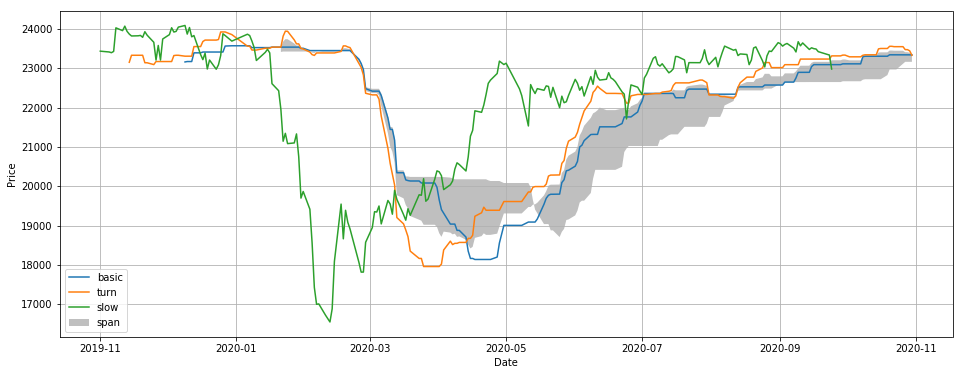

In [16]:
plt.figure(figsize=(16, 6))
plt.plot(df['basic_line'], label='basic')
plt.plot(df['turn_line'], label='turn')
plt.fill_between(date, df['span1'], df['span2'], facecolor='gray', alpha=0.5, label='span')
plt.plot(df['slow_line'], label='slow')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

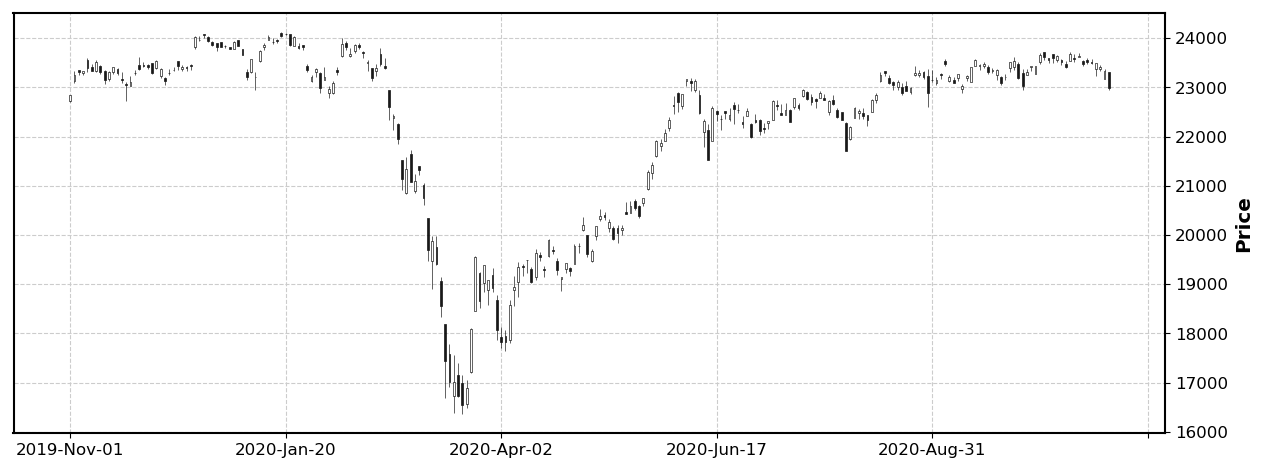

In [17]:
mpf.plot(df, type='candle', style='classic', figsize=(16, 6), xrotation=0)

In [20]:
import numpy as np

/root/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/root/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


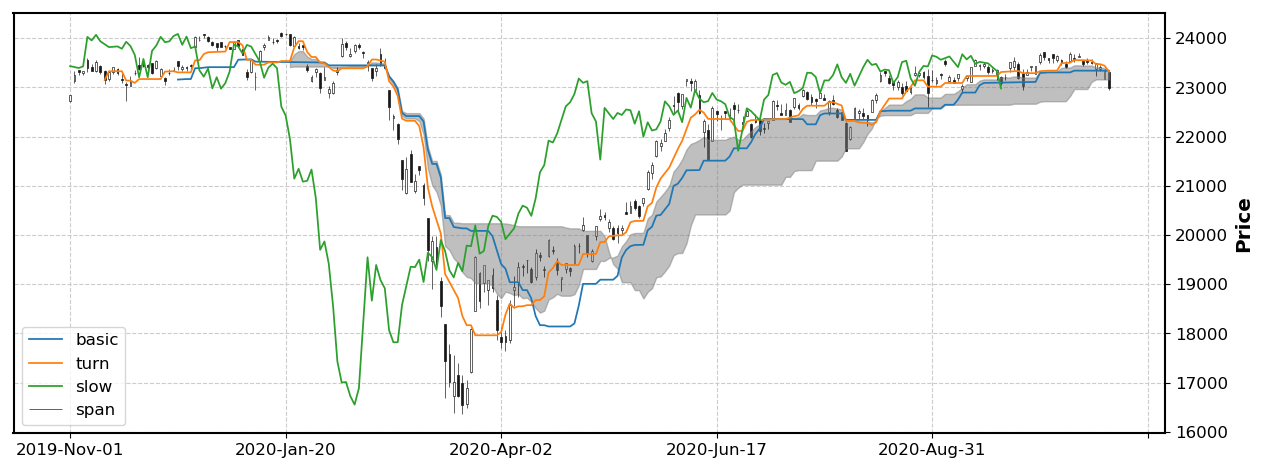

In [25]:
# 学習データを説明変数と目的変数に分割
X_train = df_train[['weekday', 'High', 'Low', 'Open', 'Close', 'Close_ratio', 'Body']]
y_train = df_train['Up']

# 学習データの説明変数と目的変数の形状を確認
print(X_train)
print(y_train)

In [26]:
lines = [mpf.make_addplot(df['basic_line']), mpf.make_addplot(df['turn_line']), mpf.make_addplot(df['slow_line'])]

labels = ['basic', 'turn', 'slow', 'span']

fig, ax = mpf.plot(df, type='candle', figsize=(16, 6), style='classic', xrotation=0, addplot=lines, fill_between=[dict(y1=df['span1'].values, y2=df['span2'].values, color='gray', alpha=0.5)], returnfig=True, savefig=
                'ichimoku.png')
ax[0].legend(labels)
plt.show()


/root/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/root/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


In [ ]:
# keras.modelsからSequentialモデルのインポート
from keras.models import Sequential

# keras.layersからDense, LSTMのインポート
from keras.layers import Dense, LSTM

# Dropoutのインポート
from keras.layers import Dropout

In [ ]:
# LSTM構築とコンパイル関数
def lstm_comp(df):
    # 入力層/中間層/出力層のネットワークを構築
    model = Sequential()
    model.add(LSTM(256, activation='relu', batch_input_shape=(None, df.shape[1], df.shape[2])))
    model.add(Dropout(0.2))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, activation='sigmoid'))

    # ネットワークのコンパイル
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model

In [ ]:
# 時系列分割のためTimeSeriesSplitのインポート
from sklearn.model_selection import TimeSeriesSplit
# accuracy算出のためaccuracy_scoreのインポート
from sklearn.metrics import accuracy_score

In [ ]:
valid_scores = []
tscv = TimeSeriesSplit(n_splits=4)

for fold, (train_indices, valid_indices) in enumerate(tscv.split(X_train_np_array)):
    X_train, X_valid = X_train_np_array[train_indices], X_train_np_array[valid_indices]
    y_train, y_valid = y_train_np_array[train_indices], y_train_np_array[valid_indices]

    # LSTM構築とコンパイル関数にX_trainを渡し、変数modelに代入
    model = lstm_comp(X_train)

    # モデルの学習
    model.fit(X_train, y_train, epochs=10, batch_size=64)

    # モデルの予測
    y_valid_pred = model.predict(X_valid)

    # 予測値を0, 1に変換
    y_valid_pred = np.where(y_valid_pred > 0.5, 1, 0)

    # 予測精度の算出と表示
    score = accuracy_score(y_valid, y_valid_pred)
    print(f'Fold {fold}: accuracy = {score}')

    # 予測精度をリストに追加
    valid_scores.append(score)

# 予測精度の平均を算出
print(f'valid_scores: {valid_scores}')
cv_score = np.mean(valid_scores)
print(f'cv_score: {cv_score}')